In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
data = pd.read_csv('titanic_toy.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
X = data.drop(columns=['Survived'])
y=data['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [8]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_mdeian'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [9]:
X_train.head()

,Age,Fare,Family,Age_mean,Age_mdeian,Fare_mean,Fare_median
140,NaN,15.2458,2,29.745184,29.0,15.245800,15.2458
439,31.0,10.5000,0,31.000000,31.0,10.500000,10.5000
817,31.0,37.0042,2,31.000000,31.0,37.004200,37.0042
378,20.0,NaN,0,20.000000,20.0,31.885314,14.4542
491,21.0,7.2500,0,21.000000,21.0,7.250000,7.2500


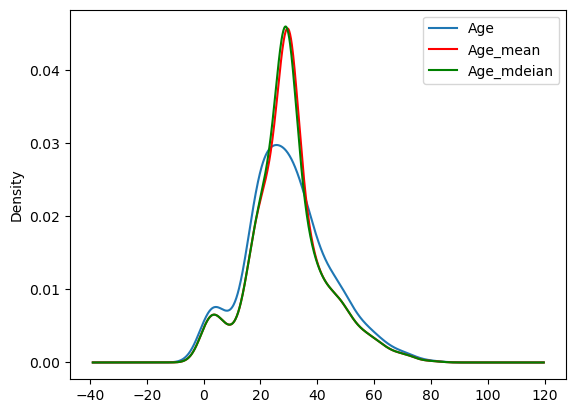

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Age_mdeian'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

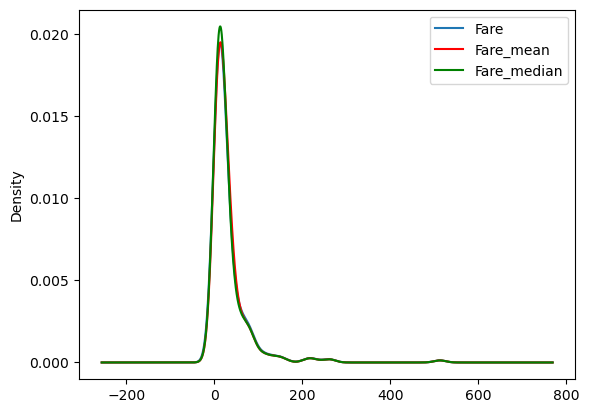

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Fare_median'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
plt.legend(lines,labels,loc='best')

<Axes: >

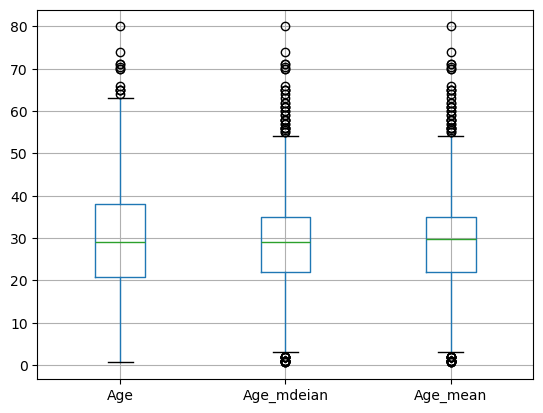

In [14]:
X_train[['Age','Age_mdeian','Age_mean']].boxplot()

from above plot we can see that imputing values on age column with mean and median introduces new outliers so this is not the correct method for imputing values in Age column

<Axes: >

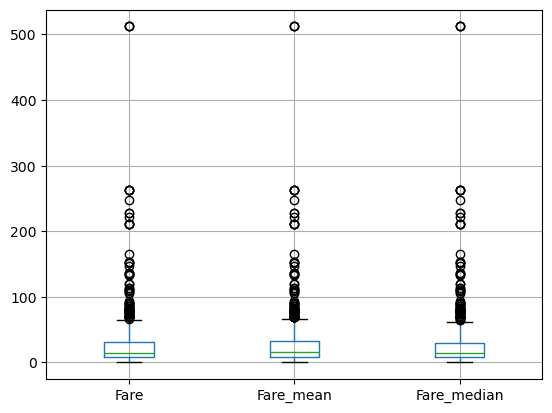

In [16]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

# Using SimpleImputer Class

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [19]:
trf = ColumnTransformer(transformers=[
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [20]:
trf.fit(X_train)

E:\Anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [21]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [24]:
X_train = pd.DataFrame(X_train,columns=['Age', 'Fare', 'Family'])

In [25]:
X_train

,Age,Fare,Family
0,29.745184,15.2458,2.0
1,31.000000,10.5000,0.0
2,31.000000,37.0042,2.0
3,20.000000,14.4542,0.0
4,21.000000,7.2500,0.0
...,...,...,...
707,39.000000,83.1583,2.0
708,19.000000,7.8542,1.0
709,29.745184,7.7333,0.0
710,36.000000,17.4000,1.0
